In [1]:
num_trials = 8
using SharedArrays
using Distributed
addprocs(num_trials)

@everywhere using PyCall
@everywhere using Random

In [2]:
@everywhere include("seajul.jl")
@time begin

epochs = 200
T = Float64


Wa = SharedArray{T}(num_trials, 1, 2)
ra = SharedArray{T}(num_trials, epochs)

for i in 1:num_trials
    seed = rand(1:2^16)
    Random.seed!(seed)
    env = SJ.PendEnv(1,1,1000)
    W = randn(T, 1, 2)
    #W = Wa[i,:,:]

        
    #W,rews,μ,sig = SJ.ars_v2t!(env,W,epochs,T=T)
    W,rews = SJ.ars_v1t!(env,W,epochs)

    Wa[i,:,:] = W 
    ra[i,:] = rews

end
end

 97.295339 seconds (2.78 G allocations: 202.177 GiB, 18.69% gc time)


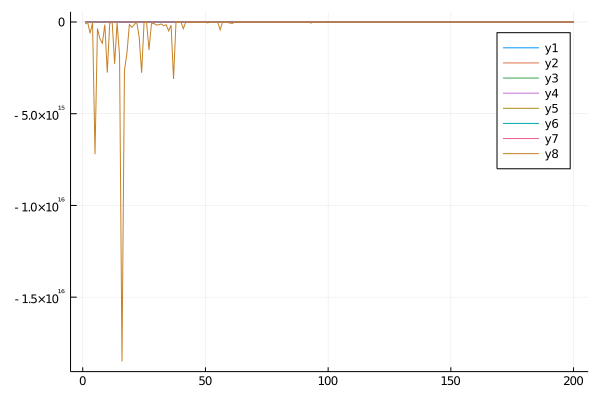

In [3]:
using Plots

plot()
for i in 1:num_trials
    plot!(ra[i,:])
end
plot!()

In [6]:
env = SJ.PendEnv(1,1,1000)
X,A,R = SJ.do_rollout_eval(env, (x)->Wa[2,:,:]*x)

([-0.1515341170670696 0.40369158467224003; -0.14705633062768372 0.4918765818154616; … ; 1.5865233190796995 -7.495157425416727e-5; 1.586522559624739 -7.692701591028851e-5], [-0.681430415412593; -0.8723712866869583; … ; 0.15391254773026158; 0.1539169220816999], -2456.813553932828)

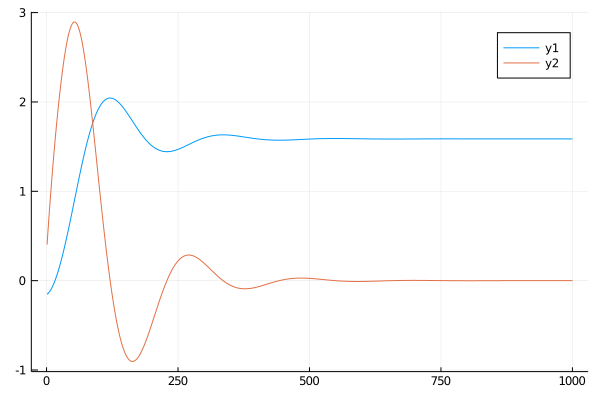

In [7]:
plot(X)

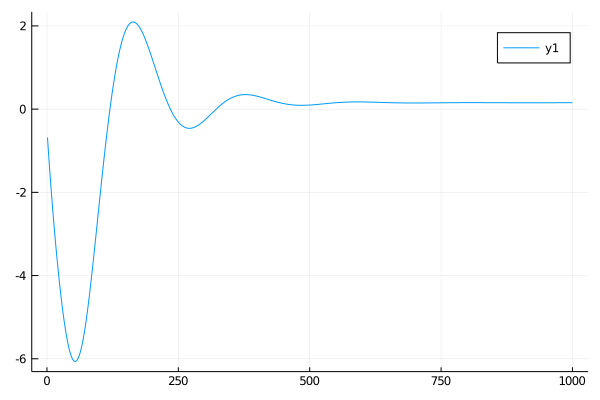

In [8]:
plot(A)